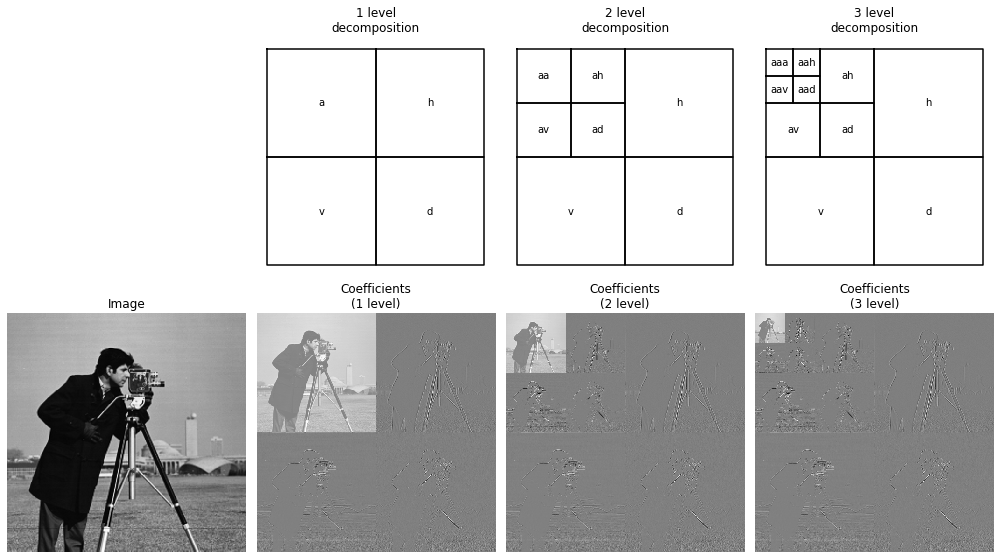

In [5]:
%matplotlib inline
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [73]:
c = pywt.wavedec2(x, 'db2', mode='periodization', level=2)


In [74]:
x= np.array(c)

In [8]:
x.shape

(512, 512)

In [4]:
x.shape

NameError: name 'x' is not defined

In [31]:
s = pywt.dwt2(x,wavelet='db2')

In [33]:
x = pywt.idwt2(s,wavelet='db2')

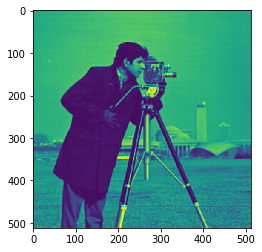

In [35]:
plt.imshow(x)

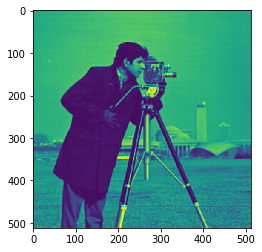

In [38]:
plt.imshow(x)

In [37]:
x = pywt.data.camera().astype(np.float32)


In [4]:
import torch
from pytorch_wavelets import DWTForward, DWTInverse # (or import DWT, IDWT)
import pywt, math

In [11]:
c = torch.Tensor(sqrt)

In [25]:
import pywt, math
#c = math.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]

myOtherWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)

pywt._extensions._pywt.Wavelet(name='myHaarWavelet', filter_bank=([0.7071067811865476, 0.7071067811865476], [-0.7071067811865476, 0.7071067811865476], [0.7071067811865476, 0.7071067811865476], [0.7071067811865476, -0.7071067811865476]))

In [24]:
c = torch.Tensor([math.sqrt(2)/2])

In [20]:
c

tensor([0.7071])

In [30]:
myOtherWavelet.filter_bank

([0.7071067690849304, 0.7071067690849304],
 [-0.7071067690849304, 0.7071067690849304],
 [0.7071067690849304, 0.7071067690849304],
 [0.7071067690849304, -0.7071067690849304])

In [29]:
filter_bank

[[tensor([0.7071]), tensor([0.7071])],
 [tensor([-0.7071]), tensor([0.7071])],
 [tensor([0.7071]), tensor([0.7071])],
 [tensor([0.7071]), tensor([-0.7071])]]

In [1]:
import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
xfm = DTCWTForward(J=3, biort='near_sym_b', qshift='qshift_b').cuda()

In [2]:
from pytorch_wavelets.dwt.lowlevel import *

In [3]:
?? afb1d

Signature:  afb1d(x, h0, h1, mode='zero', dim=-1)
Source:   
def afb1d(x, h0, h1, mode='zero', dim=-1):
    """ 1D analysis filter bank (along one dimension only) of an image

    Inputs:
        x (tensor): 4D input with the last two dimensions the spatial input
        h0 (tensor): 4D input for the lowpass filter. Should have shape (1, 1,
            h, 1) or (1, 1, 1, w)
        h1 (tensor): 4D input for the highpass filter. Should have shape (1, 1,
            h, 1) or (1, 1, 1, w)
        mode (str): padding method
        dim (int) - dimension of filtering. d=2 is for a vertical filter (called
            column filtering but filters across the rows). d=3 is for a
            horizontal filter, (called row filtering but filters across the
            columns).

    Returns:
        lohi: lowpass and highpass subbands concatenated along the channel
            dimension
    """
    C = x.shape[1]
    # Convert the dim to positive
    d = dim % 4
    s = (2, 1) if d == 2 else (1, 2